In [1]:
#Paso 01:importando de las librerias
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Paso 02: llamado y asignacion del data set,asi como impresion de sus 5 primeros registros
dataset = pd.read_csv('/content/ads_redsocial.csv')
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#Paso 03:se le asignan las columnas del dataset descritas en featues_cols a X(DATOS) y la columna Purchased a Y(RESULTADOS)
feature_cols = ['User ID','Age','EstimatedSalary']

x = dataset[feature_cols]
y = dataset.Purchased

In [5]:
#Paso 04:Dividir la matriz de datos en  subconjuntos aleatorios para las pruebas y el entrenamiento
X_train, X_test,Y_train, Y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
X_train.head(3)

,User ID,Age,EstimatedSalary
250,15810075,44,39000
63,15583681,32,120000
312,15733964,38,50000


In [7]:
Y_train.head(3)

250    0
63     1
312    0
Name: Purchased, dtype: int64

In [8]:
#Paso 05:entrenando el modelo con una max de 1000 interaciones  y asignando a Y_pred las prediccioes obtenidas
logRegresion = LogisticRegression(max_iter=1000)
logRegresion.fit(X_train, Y_train)
y_pred = logRegresion.predict(X_test)

In [9]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [10]:
#Paso 10:generacin de la matriz de confucion 
matriz_confusion = metrics.confusion_matrix(Y_test, y_pred)
matriz_confusion

array([[66,  2],
       [17, 15]])

Text(0.5, 257.44, 'Etiqueta prediccion')

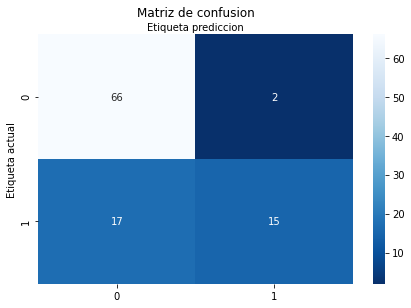

In [11]:
#Paso 11:muestra de la matriz de confusion con escala de colores azul
import numpy as np
nombre_clases = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(nombre_clases))
plt.xticks(tick_marks, nombre_clases)
plt.yticks(tick_marks, nombre_clases)
sns.heatmap(pd.DataFrame(matriz_confusion),annot=True, cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion',y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta prediccion')

In [12]:
#Paso 12:Muestra la exactitud segun la relacion de los datos verdaderos con los datos predichos
print('Exactitud', metrics.accuracy_score(Y_test,y_pred))

Exactitud 0.81
